### Inverted Dropout in Pytorch

*   Most frameworks implement inverted dropout
*   Here, the activation values are scaled by the factor 1/(1-p) during training instead of scaling the activations during
inference.
* Because it's computationally cheaper in the long run if you use your model a lot after training

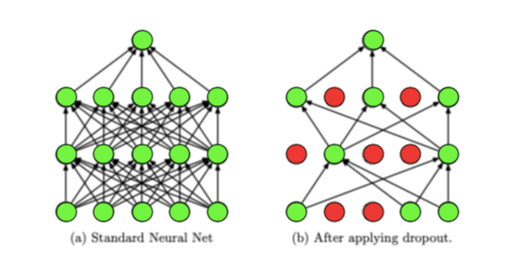


In [1]:
import torch

### Below is my original implementation of inverted dropout which I sat down and implemented based on the lecture note  from the section on Dropout in Sebastian Raschka's Playlist.



In [2]:
class Dropout(torch.nn.Module):
  def __init__(self,p=0.5):
    super().__init__()
    self.p=p

  def forward(self,X):
    if self.training:
      v=torch.rand(X.shape)
      return torch.where(v>self.p,X,0)*1/(1-self.p)
    return X


In [3]:
dropout=Dropout()

In [4]:
dropout.train()
dropout.forward(torch.rand(10))

tensor([0.5078, 1.3407, 0.0000, 1.5712, 0.0000, 1.2291, 0.0000, 0.0000, 1.2551,
        0.0000])

In [5]:
dropout.eval()
dropout.forward(torch.rand(10))

tensor([0.0962, 0.2609, 0.3302, 0.6174, 0.8607, 0.8612, 0.5998, 0.2352, 0.2599,
        0.7626])

Though when I later asked ChatGPT for improvements in my code, it recommended not to use the scalar `0` in `torch.where` because of the following reasons:

- **X can be a tensor on the GPU (or on the CPU)**.
    - If you use a literal `0`, PyTorch will automatically place that scalar value on the **CPU by default**.
    - However, if `X` is on the **GPU**, you would run into a **device mismatch error**, because PyTorch cannot perform operations between tensors on different devices.
    
- **Data Type Compatibility**:
    - The data type (e.g., `torch.float32`, `torch.int64`) of tensors also matters.
    - If `X` is a tensor of floats (`torch.float32`), and you use `0`, which is treated as a **scalar**, it may have an implicit data type mismatch because PyTorch might infer `0` as an **integer** (`torch.int32`).

Also it suggested to use `torch.bernoulli` to sample random numbers instead of using `torch.rand`

In [6]:
class Dropout02(torch.nn.Module):
  def __init__(self,p=0.5):
    super().__init__()
    self.p=p

  def forward(self,X):
    if self.training:
      return X*torch.bernoulli(torch.full_like(X,1-self.p))/(1-self.p)
    return X

In [7]:
dropout02=Dropout02()

dropout02.train()
dropout02.forward(torch.rand(10))

tensor([0.0000, 0.0000, 0.0000, 0.0000, 1.6264, 0.0726, 1.7424, 0.9285, 1.3046,
        0.9388])

In [8]:
dropout02.eval()
dropout02.forward(torch.rand(10))

tensor([0.4550, 0.9599, 0.5690, 0.6452, 0.3288, 0.8661, 0.2991, 0.8334, 0.3794,
        0.9484])